In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [65]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [66]:
df.shape

(569, 31)

In [67]:
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [68]:
corr = df.corr()
threshold = 0.8
mask_low_corr = np.abs(corr) < threshold
mask_upper_tri = np.triu(np.ones_like(corr, dtype=bool))
combined_mask = mask_low_corr | mask_upper_tri

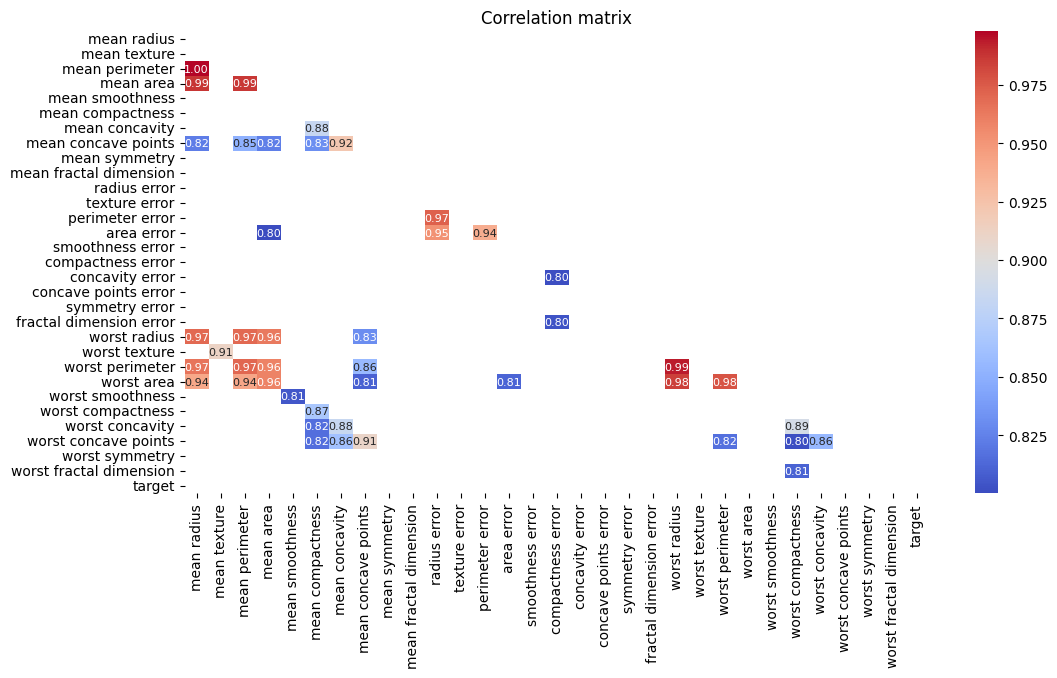

In [69]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, annot_kws={"size": 8}, fmt='.2f', cmap='coolwarm', mask=combined_mask)
plt.title("Correlation matrix")
plt.show()

In [70]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
y_pred = rfc.predict(X_test)

In [73]:
print("Accuracy score : ", accuracy_score(y_pred, y_test))

print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))

print("Classification report : \n", classification_report(y_test, y_pred))

Accuracy score :  0.9649122807017544
Confusion matrix : 
 [[40  3]
 [ 1 70]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [74]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
print(indices)

[0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]
[23 27  7 20  6 22  2  0  3 26 13 21 25 10  5  1 12 24 28 16  4 19 15 29
 11 14 18  9  8 17]


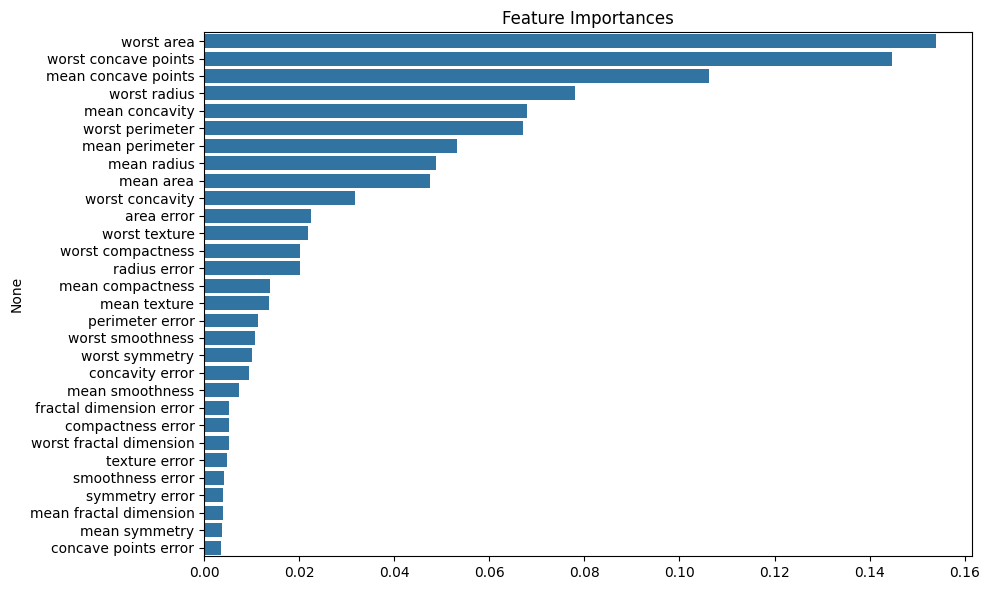

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


Improving accuracy

In [76]:
parameters = {
	'n_estimators': [100, 200, 300],
	'max_depth': [None, 10, 20, 30],
	'min_samples_split': [2, 5, 10],
	'max_features': [None, 'sqrt', 'log2']
}

In [77]:
grid_search = GridSearchCV(rfc, parameters, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [78]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [79]:
best_rfc = grid_search.best_estimator_
y_pred_best = best_rfc.predict(X_test)

In [80]:
print("Accuracy score : ", accuracy_score(y_pred_best, y_test))

print("Confusion matrix : \n", confusion_matrix(y_test, y_pred_best))

print("Classification report : \n", classification_report(y_test, y_pred_best))

Accuracy score :  0.9649122807017544
Confusion matrix : 
 [[40  3]
 [ 1 70]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Prediction

In [81]:
custom_input = pd.DataFrame([{
    'mean radius': 14.2,
    'mean texture': 20.0,
    'mean perimeter': 95.0,
    'mean area': 600.0,
    'mean smoothness': 0.10,
    'mean compactness': 0.12,
    'mean concavity': 0.13,
    'mean concave points': 0.06,
    'mean symmetry': 0.18,
    'mean fractal dimension': 0.055,
    'radius error': 0.5,
    'texture error': 1.0,
    'perimeter error': 3.0,
    'area error': 30.0,
    'smoothness error': 0.005,
    'compactness error': 0.02,
    'concavity error': 0.02,
    'concave points error': 0.01,
    'symmetry error': 0.02,
    'fractal dimension error': 0.002,
    'worst radius': 16.0,
    'worst texture': 28.0,
    'worst perimeter': 110.0,
    'worst area': 800.0,
    'worst smoothness': 0.13,
    'worst compactness': 0.25,
    'worst concavity': 0.25,
    'worst concave points': 0.10,
    'worst symmetry': 0.30,
    'worst fractal dimension': 0.07
}])


In [82]:
y_pred_custom = best_rfc.predict(custom_input)
pred_prob = best_rfc.predict_proba(custom_input)
print("Predicted class (0=Malignant, 1=Benign):", y_pred_custom)
print("Predicted probabilities [Malignant, Benign]:", pred_prob)

Predicted class (0=Malignant, 1=Benign): [1]
Predicted probabilities [Malignant, Benign]: [[0.34 0.66]]
